## 3.5 Gaussian Importance Sampling

In [1]:
library(here)
source(here("code/setup.R"))

here() starts at /Users/stefan/workspace/work/phd/thesis



pdf 
  2

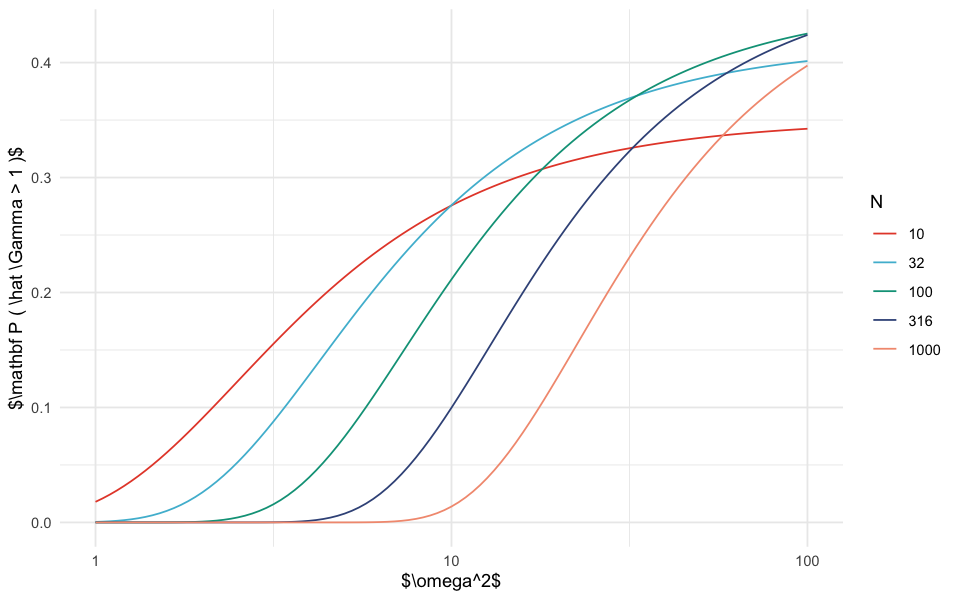

In [2]:
prob_failure_ce <- function(N, o2) {
    pchisq(q = N * (1 + 1/o2), N - 1, lower.tail = FALSE)
}

Ns <- round(10 ^ (seq(1, 3, length.out = 5)))
o2 <- 10 ^(seq(0, 2, length.out = 101))

df <- expand.grid(N = Ns, o2 = o2) %>%
    mutate(prob_failure = map2_dbl(N, o2, prob_failure_ce)) %>%
    mutate(N = factor(N))

df %>%
    ggplot(aes(o2, prob_failure, color = N)) +
    geom_line() +
    scale_x_log10() +
    #scale_y_log10(limits = c(1e-10, 1/2)) +
    labs(
        y = "$\\mathbf P ( \\hat \\Gamma > 1 )$",
        x = "$\\omega^2$"
    )
ggsave_tikz(here("tikz/ce_prob_failure.tex"), width=6, height=3)